In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.metrics import accuracy_score

mat = loadmat('ex6data1')
X = mat['X']
y = mat['y']


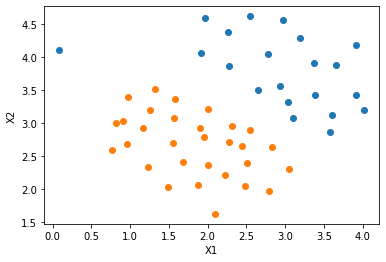

In [2]:
m,n = X.shape
pos, neg = (y==1) , (y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1])
plt.scatter(X[neg[:,0],0],X[neg[:,0],1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X,np.ravel(y))

SVC(kernel='linear')

(1.5, 5.0)

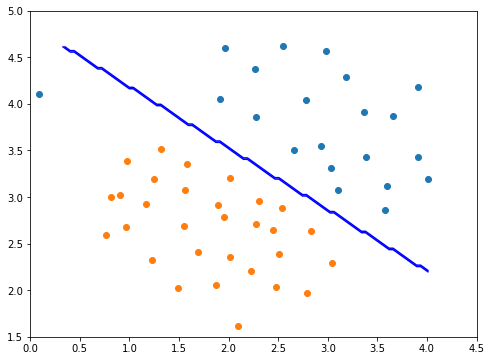

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1])
plt.scatter(X[neg[:,0],0],X[neg[:,0],1])


X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors = 'b')
plt.xlim(0,4.5)
plt.ylim(1.5,5)

In [5]:

classifier2 = SVC(C=100,kernel='linear')
classifier2.fit(X,np.ravel(y))

SVC(C=100, kernel='linear')

(1.5, 5.0)

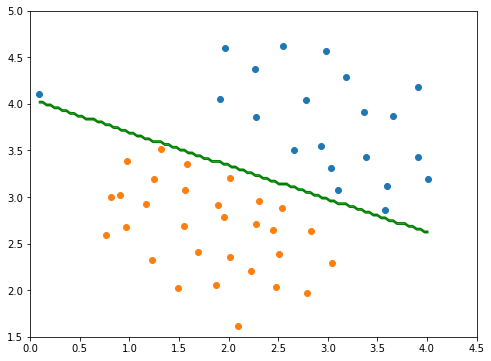

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1])
plt.scatter(X[neg[:,0],0],X[neg[:,0],1])

X_3,X_4 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_3,X_4,classifier2.predict(np.array([X_3.ravel(),X_4.ravel()]).T).reshape(X_3.shape),1,colors = 'g')
plt.xlim(0,4.5)
plt.ylim(1.5,5)

(0.4, 1.0)

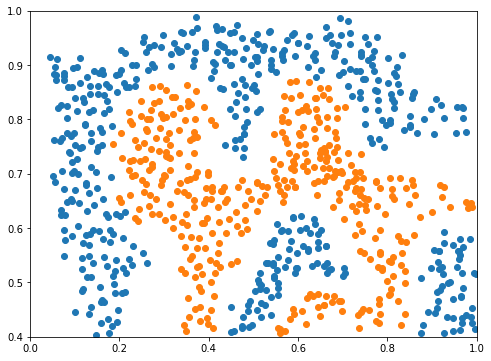

In [7]:
mat = loadmat('ex6data2')
X2 = mat['X']
Y2 = mat['y']

m,n = X2.shape
pos,neg = (Y2==1),(Y2==0)
plt.figure(figsize=(8,6))
plt.scatter(X2[pos[:,0],0],X2[pos[:,0],1])
plt.scatter(X2[neg[:,0],0],X2[neg[:,0],1])
plt.xlim(0,1)
plt.ylim(0.4,1)



In [8]:
classifier3 = SVC(kernel='rbf',gamma=30)
classifier3.fit(X2,np.ravel(Y2))

SVC(gamma=30)

(0.4, 1.0)

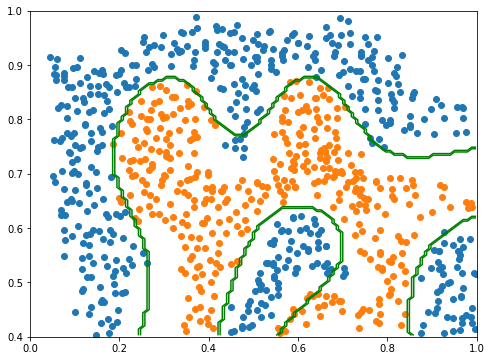

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos[:,0],0],X2[pos[:,0],1])
plt.scatter(X2[neg[:,0],0],X2[neg[:,0],1])

X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,0].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_5,X_6,classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape),1,colors='g')
plt.xlim(0,1)
plt.ylim(0.4,1)



In [10]:
mat = loadmat('ex6data3')
X3 = mat['X']
y3 = mat['y']
Xval = mat['Xval']
yval = mat['yval']


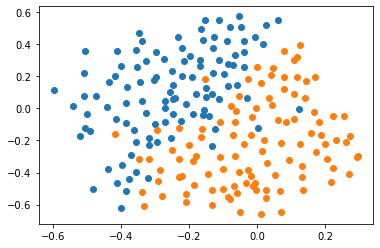

In [11]:
m,n = X.shape
pos,neg = (y3==1),(y3==0)
plt.scatter(X3[pos[:,0],0],X3[pos[:,0],1])
plt.scatter(X3[neg[:,0],0],X3[neg[:,0],1])
plt.show()

In [12]:
def best_params(X,y,Xval,yval,vals):
    
    acc = 0
    best_C = 0
    best_sigma=0
    for i in vals:
        C = i
        for j in vals:
            sigma = 1/j
            classifier4 = SVC(C=C,kernel='rbf',gamma=sigma)
            classifier4.fit(X,y)
            pred = classifier4.predict(Xval)
            score = accuracy_score(yval,pred)
            if score > acc:
                best_C = C
                best_sigma =sigma
                acc = score
                
    return best_C, best_sigma        
            

In [13]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, sigma = best_params(X3,y3.ravel(),Xval,yval.ravel(),vals)
print(C,sigma)
classifier4 = SVC(C=C,kernel='rbf',gamma=sigma).fit(X,y.ravel())
classifier4.fit(X3,y3.ravel())



0.3 100.0


SVC(C=0.3, gamma=100.0)

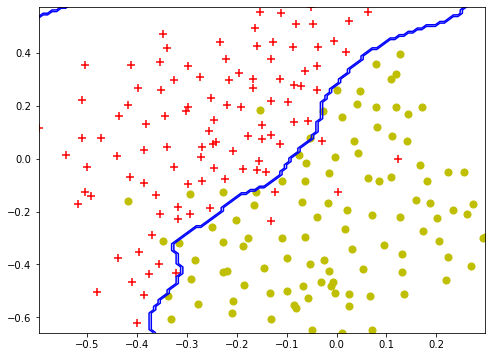

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X3[pos[:,0],0],X3[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg[:,0],0],X3[neg[:,0],1],c="y",marker="o",s=50)

X_7,X_8 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,0].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
plt.contour(X_7,X_8,classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape),1,colors="b")



In [40]:
import re 
from nltk.stem import PorterStemmer

file_contents = open('emailSample1.txt','r').read()
vocab = open('vocab.txt','r').read()
print(file_contents)
print(vocab)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com


1	aa
2	ab
3	abil
4	abl
5	about
6	abov
7	absolut
8	abus
9	ac
10	accept
11	access
12	accord
13	account
14	achiev
15	acquir
16	across
17	act
18	action
19	activ
20	actual
21	ad
22	adam
23	add
24	addit
25	address
26	administr
27	adult
28	advanc
29	advantag
30	advertis
31	advic
32	advis
33	ae
34	af
35	affect
36	affili
37	afford
38	africa
39	after
40	ag
41	again
42	against
43	agenc
44	agent
45	ago
46	agre
47	agreement
48	aid
49	air
50	al
51	alb
52	align
53	all
54	allow
55	almost
56	alon
57	along
58	alreadi
59	alsa
60	also
61	altern
62	although
63	alwai
64	am
65	amaz
66	america
67	american
68	among
69	amoun

In [41]:
vocab = vocab.split('\n')[:-1]
vocablist_d={}
for ea in vocab:
    value,key = ea.split("\t")
    vocablist_d[key] = value
    
print(len(vocablist_d))    

1899


In [42]:
def processEmail(email_contents,vocablist_d):
    
    # Lower case
    email_contents = email_contents.lower()
    
    # Handle numbers
    email_contents = re.sub("[0-9]+","number",email_contents)
    
    # Handle URLS
    email_contents = re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub("[^\s]+@[^\s]+","emailaddr",email_contents)
    
    # Handle $ sign
    email_contents = re.sub("[$]+","dollar",email_contents)
    
    # Strip all special characters
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents = email_contents.replace(str(char),"")
    email_contents = email_contents.replace("\n"," ")    
    
    # Stem the word
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(" ")]
    email_contents= " ".join(email_contents)
    
    # Process the email and return word_indices
    
    word_indices=[]
    email_list = email_contents.split()
    for char in email_list:
        if len(char) >1 and char in vocablist_d:
            word_indices.append(int(vocablist_d[char]))
    
    return word_indices
word_indices= processEmail(file_contents,vocablist_d)
print(len(word_indices))
    
    

51


In [43]:
def emailFeatures(word_indices, vocablist_d):
    """
    Takes in a word_indices vector and  produces a feature vector from the word indices. 
    """
    n = len(vocablist_d)
    
    features = np.zeros((n,1))
    print(features.shape)
    
    for i in word_indices:
        features[i] = 1
        
    return features

features = emailFeatures(word_indices,vocablist_d)
print("Length of feature vector: ",len(features))
print("Number of non-zero entries: ",np.sum(features))
        

(1899, 1)
Length of feature vector:  1899
Number of non-zero entries:  43.0


In [44]:
spam_mat = loadmat('spamTrain.mat')
X4 = spam_mat['X']
y4 = spam_mat['y']
spam_mat_test = loadmat("spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test =spam_mat_test["ytest"]


In [45]:
classifier4 = SVC(C=0.1,kernel = 'linear').fit(X4,y4.ravel())
pred = classifier4.predict(X_test)
pred_train = classifier4.predict(X4)
acc = accuracy_score(y_test,pred)
acc_train = accuracy_score(y4,pred_train)
print(f'accuracy_test = {acc*100} %')
print(f'accuracy_train = {acc_train*100} %')


accuracy_test = 98.9 %
accuracy_train = 99.825 %


In [50]:
weights = classifier4.coef_[0]
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1),weights.reshape(1899,1)))

df = pd.DataFrame(weights_col)
df.sort_values(by = [1],ascending = False,inplace=True)

df

,0,1
1190,1191.0,0.500614
297,298.0,0.465916
1397,1398.0,0.422869
738,739.0,0.383622
1795,1796.0,0.367710
...,...,...
400,401.0,-0.405492
1880,1881.0,-0.409923
1764,1765.0,-0.428355
1665,1666.0,-0.438072


In [52]:
top_predictors = df.reset_index().iloc[0:10]
top_predictors

,index,0,1
0,1190,1191.0,0.500614
1,297,298.0,0.465916
2,1397,1398.0,0.422869
3,738,739.0,0.383622
4,1795,1796.0,0.367710
5,155,156.0,0.345064
6,476,477.0,0.323632
7,1851,1852.0,0.269724
8,1298,1299.0,0.267298
9,1263,1264.0,0.261169


In [57]:
predictors = []
for i in top_predictors[0]:
    for keys,values in vocablist_d.items():
        if str(int(i)) == values:
            predictors.append(keys)
            
predictors            
            

['our',
 'click',
 'remov',
 'guarante',
 'visit',
 'basenumb',
 'dollar',
 'will',
 'price',
 'pleas']

In [61]:
top_predictors['words'] = predictors
top_predictors


,index,0,1,words
0,1190,1191.0,0.500614,our
1,297,298.0,0.465916,click
2,1397,1398.0,0.422869,remov
3,738,739.0,0.383622,guarante
4,1795,1796.0,0.367710,visit
5,155,156.0,0.345064,basenumb
6,476,477.0,0.323632,dollar
7,1851,1852.0,0.269724,will
8,1298,1299.0,0.267298,price
9,1263,1264.0,0.261169,pleas
